# Data Science Test

 



## Python

Complete the following exercises which is set to test your Python ability and understanding.

### Exercise 1.1

Below uses a loop to find the intersection of two lists of book ids. 

In [1]:
import time
import pandas as pd
import numpy as np

# File to use. All Coding Books is a list of IDs for all coding books and Books In Last Two Years 
# is a list of IDs of all books published in the last two years
all_coding_books = "https://raw.githubusercontent.com/ksynnott/VM-DS-Data/master/all_coding_books.txt"
books_in_last_two_years = "https://raw.githubusercontent.com/ksynnott/VM-DS-Data/master/books_published_last_two_years.txt"

# Read files to numpy arrays
recent_books = np.genfromtxt(books_in_last_two_years , delimiter="\n")
coding_books = np.genfromtxt(all_coding_books ,delimiter="\n")

# Start clock
start = time.time()
recent_coding_books = [] # Set recent coding book array

# Loop through recent_book and see if ID matches an ID in coding books

for book in recent_books:
    if book in coding_books:
        recent_coding_books.append(book)

# Print Length and Duration
print(len(recent_coding_books))
print('Duration: {} seconds'.format(time.time() - start))


96
Duration: 0.3756980895996094 seconds




```
# This is formatted as code
```

Can you execute in a faster way using arrays? 

In [2]:
"""

Excercise 1.1
FASTER METHOD USING ARRAYS 

"""
#Starting new clock
starts = time.time()

#Creating new arrays from olds lists
codin_books_array = np.array(coding_books)
recent_books_array = np.array(recent_books)

#my code is below.
recent_coding_books_II = set(recent_books).intersection(coding_books)

#Finding intersections between two arrays
#recent_coding_books_II = np.intersect1d(codin_books_array,recent_books_array)
        
#Printing Length and Duration
print(len(recent_coding_books_II))
print('Duration of array code: {} seconds'.format(time.time() - starts)) 

#CHECKING WORK IS CORRECT

#Checking if the lenght of the previous answer's list and new answer's array are the same
print(len(recent_coding_books)-len(recent_coding_books_II))
#If the answer is 0, then they have the same length
#recent codding books and recent_coding lenght=0
# Duration of array code: 0.011


96
Duration of array code: 0.03397512435913086 seconds
0


### Exercise 1.2

You have an ecommerce gift store which has 50,000 users that each listed a gift on a wish list. You have the prices for each of these gifts stored in gift_price.txt. In an effort to bring your business to the top of mind during the COVID lockdown, you're going to give each customer their wish list gift for free if it is under £25. Calculate the total cost of all gifts under £25 to see how much you'd spend on free gifts. Here's one way you could've done it.

In [ ]:
import time
import pandas as pd
import numpy as np

# The gifts cost file is the list of gift prices
gifts = "https://raw.githubusercontent.com/ksynnott/VM-DS-Data/master/gift_price.txt"
gift_costs = np.genfromtxt(gifts, delimiter="\n")

start = time.time()

total_price = 0
# Loop for each price in array
for cost in gift_costs:
    if cost < 25:
        total_price += cost

print(total_price)
print('Duration: {} seconds'.format(time.time() - start))


444923.0
Duration: 0.062345266342163086 seconds


Can you refactor this to run in half the time? 

In [ ]:
""" 

Excercise 1.2
HALF THE TIME 


"""

#Adding up the total cost of all gifts that sum up under 25
start_II = time.time()

#Converting the gift_costs list into array
gift_cost_II = np.array(gift_costs)

#Filtering indices that are under £25
#free = np.where(gift_cost_II < 25)

#Creating new array with all indices under £25
#under_25 = gift_cost_II[free]

#Summarising indices to find the total price of all gifts under £25
#total_price_II = np.sum(under_25)

#Mycode 
total_price_II = (gift_cost_II[gift_cost_II < 25]).sum()


print(total_price_II)
print('Duration: {} seconds'.format(time.time() - start_II))


#CHECKING WORK IS CORRECT
print(total_price - total_price_II)
#If the answer is 0, then both values are the same
# both values are the same and Duration: 0.002706904983520508



444923.0
Duration: 0.0027227401733398438 seconds
0.0


## Pandas

Complete the following exercises which is set to test your Pandas ability and understanding.

In [ ]:
import pandas as pd

wine_file = "https://raw.githubusercontent.com/ksynnott/VM-DS-Data/master/winequality.csv"

#df = pd.read_csv(wine_file, sep=';')
#df.head()
#My Code added lambda function
df = pd.read_csv(wine_file, sep=';').rename(columns=lambda x:x.replace(" ","_"))
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exercise 2.1

Replace the spaces in the column labels with underscores to be able to reference columns with dot notation

In [ ]:
"""

Excercise 2.1

"""
#Replacing space with underscore in column labels
#df.columns = df.columns.str.replace(' ','_')

#My Code
df = pd.read_csv(wine_file, sep=';').rename(columns=lambda x:x.replace(" ","_"))
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulphur_dioxide,total_sulphur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exercise 2.2

Investigate how different features of this dataset relate to the quality rating of the wine.

A very simple way you could do this is by observing the medium quality rating for the top and bottom half of each feature.


Write a function that takes in the dataframe and the column name (feature) which then converts that feature value to a string. This string is "high" is the feature value is above the medium and "low" if it is below. 




In [ ]:
"""

Excercise 2.2

"""
def numeric_to_buckets(df, column_name):

    #finding the median of each feature
    med = df[column_name].median()
    
    #Allowing iteration via the enumerate function
    for row, val in enumerate(df[column_name]):
        if val >= med:
            df.loc[row, column_name] = 'High'
        else:
            df.loc[row, column_name] = 'Low' 

            

Use the function you created to print the wine quality for the high and low buckers of the feature

The result for Fixed Acidity is shown here

high    5.726061

low     5.540052


In [ ]:
# Make a copy of the dataframe 
df_copy = df.copy()


for feature in df_copy.columns[:-1]: # loop over all features
    numeric_to_buckets(df_copy, feature) # the function you created
    print(df_copy.groupby(feature).quality.mean(), '\n')

fixed_acidity
High    5.726061
Low     5.540052
Name: quality, dtype: float64 

volatile_acidity
High    5.392157
Low     5.890166
Name: quality, dtype: float64 

citric_acid
High    5.822360
Low     5.447103
Name: quality, dtype: float64 

residual_sugar
High    5.665880
Low     5.602394
Name: quality, dtype: float64 

chlorides
High    5.507194
Low     5.776471
Name: quality, dtype: float64 

free_sulphur_dioxide
High    5.595268
Low     5.677136
Name: quality, dtype: float64 

total_sulphur_dioxide
High    5.522981
Low     5.750630
Name: quality, dtype: float64 

density
High    5.540574
Low     5.731830
Name: quality, dtype: float64 

pH
High    5.598039
Low     5.675607
Name: quality, dtype: float64 

sulphates
High    5.898917
Low     5.351562
Name: quality, dtype: float64 

alcohol
High    5.958904
Low     5.310302
Name: quality, dtype: float64 



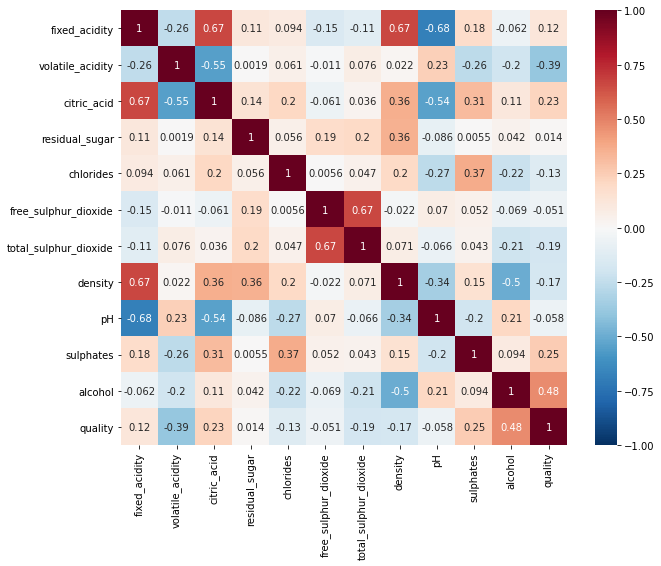

In [ ]:
# i would correlation matrix to see how quality and other features are correlated with each other and quality.

import matplotlib.pyplot as plt
import seaborn as sns 
correlation = df.corr()
# display(correlation)
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
# quality is correlated more with alcohol and volatile_acidity than any other features.

### Exercise 2.3

Generate density plots for the following features 



*   pH
*   Density
*   Alcohol
*   Sulphates


It should look as follows


![alt text](https://raw.githubusercontent.com/ksynnott/VM-DS-Data/master/download%20(3).png)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

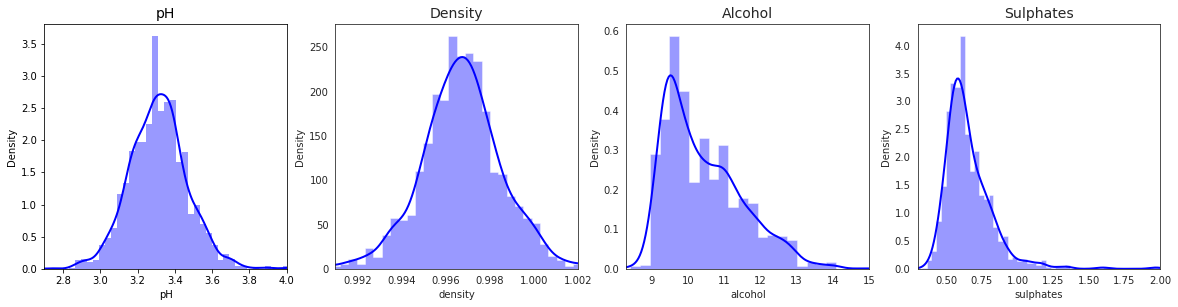

In [ ]:
"""

Excercise 2.3

"""    
####### NOTE ######
#In the queation it asks to display density, but the example shows Residual Sugar. 
#I decided to display Density, as the ranges matched the density values
import seaborn as sns  
import matplotlib.pyplot as plt  # Oya-changed from matplotlib 

#Creating a figure
figure = plt.figure(figsize=(20,4.5)) # Oya-updated with new fig sizes.

#Adding 4 Subplots, with varying x axis limits
#Density Graph 1
ax1 = figure.add_subplot(141)
ax1.set_title("pH",fontsize=14)
ax1.set_xlim(2.7 , 4)
sns.distplot(df['pH'] , ax=ax1 , color='royalblue', hist_kws={"histtype": "stepfilled",
                             "color": "blue"},kde_kws={"color": "blue","lw": 2})

plt.grid(False)
sns.set_style(style='white')


#Density Graph 2
ax2 = figure.add_subplot(142)
ax2.set_title('Density',fontsize=14)
ax2.set_xlim(0.991 , 1.002)
sns.distplot(df.density , ax=ax2 ,color='royalblue',hist_kws={"histtype": "stepfilled",
                             "color": "blue"}, kde_kws={"color": "blue","lw": 2})
plt.grid(False)
sns.set_style(style='white')

#Density Graph 3
ax3 = figure.add_subplot(143)
ax3.set_title('Alcohol',fontsize=14)
ax3.set_xlim(8.3 , 15)
sns.distplot(df.alcohol , ax=ax3 ,color='royalblue',hist_kws={"histtype": "stepfilled",
                             "color": "blue"},kde_kws={"color": "blue","lw": 2})
plt.grid(False)
sns.set_style(style='white')

#Density Graph 4
ax4 = figure.add_subplot(144)
ax4.set_title('Sulphates',fontsize=14)
ax4.set_xlim(0.30 , 2)
sns.distplot(df.sulphates , ax=ax4 ,color='royalblue',hist_kws={"histtype": "stepfilled",
                             "color": "blue"},kde_kws={"color": "blue","lw": 2})
plt.grid(False)
sns.set_style(style='white')



### Exercise 2.4

It is clear from the density plots that pH and Residual most closely resemble a normal distrubution. With this in mind identify the following  for pH and Residual Suger

*   Mean
*   Std Dev
*   95th quantile
*   70th quantile


In [ ]:
"""

Excercise 2.4

"""    
#pH Statistics
ph_X   = df.pH.mean()
pH_STD = df.pH.std()
ph_70  = round(df.pH.quantile(0.7) , 1)
ph_95  = df.pH.quantile(0.95)

#Sugar Residual Statistics
residual_X   = df.residual_sugar.mean()
residual_STD = df.residual_sugar.std()
residual_70  = round(df.residual_sugar.quantile(0.7) , 1)
residual_95  = df.residual_sugar.quantile(0.95)


print("pH_mean=",ph_X)
print("pH_std=",pH_STD)
print("pH_70th_quantile=", ph_70)
print("pH_95th_quantile=",ph_95)

print("residual_mean=",residual_X)
print("residual_std=",residual_STD)
print("residual_70th_quantile=",residual_70)
print("residual_96th_quantile=",residual_95)


pH_mean= 3.311113195747343
pH_std= 0.15438646490354266
pH_70th_quantile= 3.4
pH_95th_quantile= 3.57
residual_mean= 2.5388055034396517
residual_std= 1.4099280595072805
residual_70th_quantile= 2.5
residual_96th_quantile= 5.1


## AB Testing

The following are results of a Brand Lift Study investigating Brand Awareness with a control and experiment group. The experiment group were exposed to an ad and the contol were not. The positive response column has binary values where 1 signifies that person is awareness of the brand in question and 0 signifies that person is not. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_name = "https://raw.githubusercontent.com/ksynnott/VM-DS-Data/master/BrandLiftStudy.csv"
df_BLS = pd.read_csv(file_name)
df_BLS.head()


,group,Positive Response
0,Control,0
1,Control,0
2,Control,1
3,Control,0
4,Control,0


In [ ]:
df_BLS['group'].groupby(df_BLS['Positive Response']).value_counts()


Positive Response  group       
0                  Control         221
                   Experimental    208
1                  Experimental     42
                   Control          29
Name: group, dtype: int64

In [ ]:
df_BLS['group'].value_counts()

Experimental    250
Control         250
Name: group, dtype: int64

### Exercise 3.1

Calculate the probability of a positive response for both the control and experiment group

In [ ]:
# Show mean duration of Control and Experimental groups
"""

Excercise 3.1

"""
#P(A) = n(A)/n(S)
# Finding Populayion size for each group coniditon
control_pop = len(df_BLS.loc[df_BLS['group'] == "Control" ])   #250
exper_pop   = len(df_BLS) - control_pop                        #250

#Finding the numer of positive responses in each group
control_n = len(df_BLS.loc[(df_BLS['group'] == "Control")      & (df_BLS['Positive Response'] == 1)])    #29
exper_n   = len(df_BLS.loc[(df_BLS['group'] == "Experimental") & (df_BLS['Positive Response'] == 1)])    #42

# Double Checking if the number of positive responses are correct
df_BLS.groupby(['group']).sum()

#Calculating Probability
control_prob =  control_n/control_pop                 #0.116
experiment_prob = exper_n/exper_pop                   #0.168


print("Control Mean = " +str(control_prob))
print("Experimental Mean = " + str(experiment_prob))



Control Mean = 0.116
Experimental Mean = 0.168


In [ ]:
# Show mean duration of Control and Experimental groups
"""

Excercise 3.1

"""
#DIFFERENT WAY OF CALCULATING PROBABILITY FOR EACH GROUP BY RESPONSE TO HAVE A QUICK VIEW
rating_probs = df_BLS.groupby('group').size().div(len(df_BLS))
probability= df_BLS.groupby(['Positive Response', 'group']).size().div(len(df_BLS)).div(rating_probs, axis=0, level='group')
print(probability)

Positive Response  group       
0                  Control         0.884
                   Experimental    0.832
1                  Control         0.116
                   Experimental    0.168
dtype: float64


### Exercise 3.2

Calculate the Pool Probability of this brand lift study and the Pool Standerd Error



In [ ]:
"""

Excercise 3.2

"""
#refrence : https://rstudio-pubs-static.s3.amazonaws.com/201749_9fc280333a5c4f448687e1d99b9bdf76.html

#Calculating the Pool Proability
prob_pooled = (control_n + exper_n) / (control_pop + exper_pop)
print("Pooled Probability = ",prob_pooled )

#Calculate pooled standard error 
import math as math
se_pool = math.sqrt(pool_prob*(1-pool_prob)*(1/control_pop + 1/exper_pop))   
print("Pooled_Std = ",se_pool)


Pooled Probability =  0.142
Pooled_Std =  0.031219993593849436


### Exercise 3.3

The Null hypothesis is that there is no difference between the control and experimental group i.e `control_prob - experiment_prob = 0`.

With that in mind and after calculating the Pool Probability and Pool Standerd Error would you reject the null hypothesis?

In [ ]:
"""

Excercise 3.3

"""
#H0 = control_prob - experiment_prob  = 0   : the difference between the control and experiment is due to chance
#H1 = control_prob - experiment_prob !=     : the difference represents a statistically significant difference

# Calculating d = hypothesized difference between probability of positive response in the experiment and control groups
d = control_prob -experiment_prob

#Calculate margin of error
#For a 95% confidence interval, z_score = 1.96.
practical_significance = 0.01 #user defined

m = 1.96*se_pool 
print("marginal_error = ",m)
print("diff=", d)

#Test if we can reject the null hypothesis
lower_bound = d - m
upper_bound = d + m
print("lower_bound=",lower_bound)

practical_significance = 0.01 #user defined

if practical_significance < lower_bound:
    
    print("Reject null hypothesis")
else: 
    print("Do not reject the null hypothesis")

print("The lower bound of the confidence interval is ", round(lower_bound * 100, 2), "%")
print("The upper bound of the confidence interval is ", round(upper_bound * 100, 2), "%")


marginal_error =  0.061191187443944896
diff= -0.052000000000000005
lower_bound= -0.11319118744394491
Do not reject the null hypothesis
The lower bound of the confidence interval is  -11.32 %
The upper bound of the confidence interval is  0.92 %


In this example the confidence interval is between -0.11.3% and 0.92%. Given the minimum level defined in the practical significance level is 1%, we could only reject the null hypothesis if the confidence interval lower bound was above 1%. Therefore we cannot reject the null hypothesis and conclude which difference between the control and experiment is due to chance. We need to increase sample size and test it again



## Sklearn

This is an exercise to demonstrate your familiarity of sklearn, in particular 
SVMs, Random Forests and KNN Classifiers. 

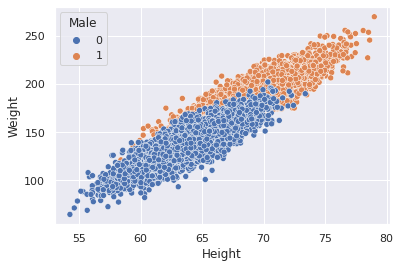

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


# Helpful for later
# Import our model and performance assessement classes from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Load data
file_name = "https://raw.githubusercontent.com/ksynnott/VM-DS-Data/master/heights_weights.csv"
df_sk = pd.read_csv(file_name)


ax = sns.scatterplot(x="Height", y="Weight", hue="Male", data=df_sk)

In [ ]:
#checking missing values before starting
df_sk.isna().sum()

Height    0
Weight    0
Male      0
dtype: int64

### Exercise 4.1

Extract the data from the Data Frame so it is prepared for sklearn. 

Use Sklearns *train_test_split* to create a training (70% of data) and test set (30% of data)

In [ ]:
df_sk.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [ ]:
#predicting Male or Female based on their height and weight
#two classes -Male or Not Male
y=df_sk.Male
X=df_sk.drop('Male',axis=1)
print(X.head())

      Height      Weight
0  73.847017  241.893563
1  68.781904  162.310473
2  74.110105  212.740856
3  71.730978  220.042470
4  69.881796  206.349801


In [ ]:
# checking if values for both class is on balance between the two classes
pd.value_counts(pd.Series(y))

1    5000
0    5000
Name: Male, dtype: int64

In [ ]:
"""

Excercise 4.1

"""

from sklearn.model_selection import train_test_split
#Splitting so the test set split is 30%
from sklearn.model_selection import train_test_split

#Use Sklearns train_test_split to create a training (70% of data) and test set (30% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Exercise 4.2

Fit and Train a Logistic Regression classifier 

Use the test set to predict 

Evaluate using accurcy. 

Also use sklearns confusion matric and classification_report

In [ ]:
"""

Excercise 4.2

"""
# Fit (train) the Logistic Regression classifier
 
# what is X and y and how to get the values
# The classification model attempts to predict the output value when given several input variables, placing the example into the correct category.
# Logistic regression is basically a supervised classification algorithm. In a classification problem, the target variable(or output), y, can take only discrete values for given set of features(or inputs), X. Contrary to popular belief, logistic regression IS a regression model.
 
#Logistic Regression model fitting
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
 
#Predicting the test set results and calculating the accuracy
predicted = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predicted)
print('Confusion matrix:\n',confusion_matrix)

 
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))



Accuracy of logistic regression classifier on test set: 0.92
Confusion matrix:
 [[1385  104]
 [ 140 1371]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1489
           1       0.93      0.91      0.92      1511

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



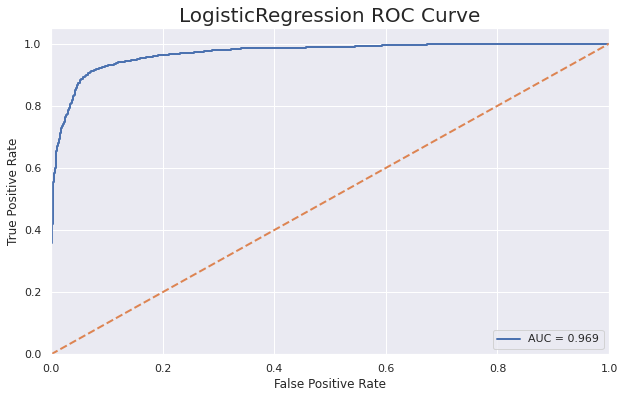

In [ ]:
# Plot the ROC Curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
rf_probs = logreg.predict_proba(X_test) # Predict class probabilities of the input samples 
rf_preds = rf_probs[:,1]
 
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, rf_preds) 
roc_auc = auc(fpr,tpr) 

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, lw=2, label='AUC = %0.3f' % roc_auc) 
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression ROC Curve',fontsize=20)
plt.legend(loc="lower right")
plt.show()

### Exercise 4.3
Fit and Train a Random Forest classifier

Use the test set to predict

Evaluate using accurcy.

Also use sklearns confusion matric and classification_report

In [ ]:
"""

Excercise 4.3

"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
#split dateset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction
Random_model = RandomForestClassifier()
# Fit (train) the Random Forest classifier
Random_model.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred1 = Random_model.predict(X_test)
print('Accuracy of RandomForest classifier on test set: {:.2f}'.format(Random_model.score(X_test, y_test)))

# Display the Confusion Matrix and Classification Report

#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

 
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

Accuracy of RandomForest classifier on test set: 0.90
[[1376  113]
 [ 175 1336]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1489
           1       0.92      0.88      0.90      1511

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



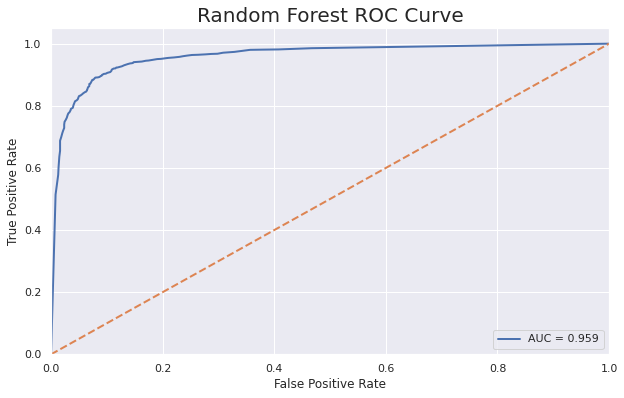

In [ ]:
# Plot the ROC Curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
rf_probs = Random_model.predict_proba(X_test) # Predict class probabilities of the input samples 
rf_preds = rf_probs[:,1]
 
# Compute ROC curve and ROC area for each class
fpr,tpr,threshold = roc_curve(y_test, rf_preds) 
roc_auc = auc(fpr,tpr) 

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, lw=2, label='AUC = %0.3f' % roc_auc)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=20)
plt.legend(loc="lower right")
plt.show()

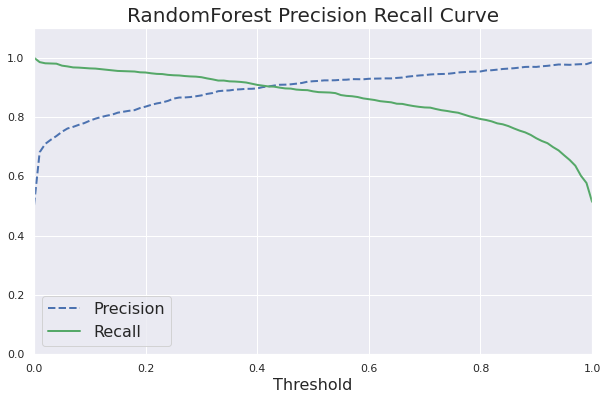

In [ ]:
# Plot the precision recall curve
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, rf_preds)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="lower left", fontsize=16)
    plt.ylim([0, 1.1])
    
plt.figure(figsize=(10,6))
plt.title('RandomForest Precision Recall Curve',fontsize=20)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([0, 1])
plt.show()

### Exercise 4.4
Fit and Train a Support Vector Machine classifier

Use the test set to predict

Evaluate using accurcy.

Also use sklearns confusion matric and classification_report

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit (train) the Support Vector Machine classifier
svc = SVC(kernel='linear').fit(X_train,y_train)
svc

y_pred2 = svc.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))

# Display the Confusion Matrix and Classification Report

#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred2)
print(confusion_matrix)

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))


Accuracy of logistic regression classifier on test set: 0.92
[[1383  106]
 [ 136 1375]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1489
           1       0.93      0.91      0.92      1511

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



### Exercise 4.5
Fit and Train a K-Nearest Neighbour classifier

Use the test set to predict

Evaluate using accurcy.

Also use sklearns confusion matric and classification_report

In [ ]:
# Fit (train) the KNN classifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(X_train1)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test1)
x_test = pd.DataFrame(x_test_scaled)




In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=4)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8976666666666666


In [ ]:
# Display the Confusion Matrix and Classification Report 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1279  210]
 [  97 1414]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1489
           1       0.87      0.94      0.90      1511

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



In [ ]:
#calculating the mean of error for all the predicted values where K ranges (1,40)

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

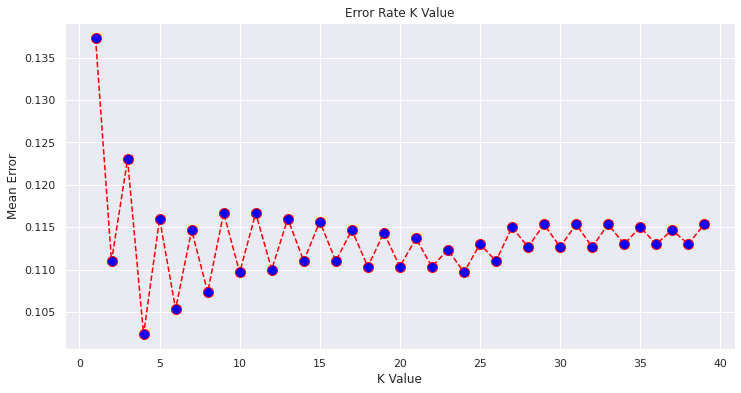

In [ ]:
#plot shows the error values against K values

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
#the shows that optimum k value for KNN classifier. Our best k is around 4 for this model.

### Exercise 4.6
1. In your own words explain sklearns classification matric.

Classification matrix is also known as confusion matrix. It is a table that used to evaluate the performance of statistical  or classification models. It shows how many actual conditions are predicted correctly and incorrectly. The matrix shows actual and predicted conditions such as True Positive,True negative,False Positive.

2. Knowing and understanding the classification matric define the following and in your own words explain their importance.

* Precision
* Recall
* F1-score


*   Precision is true positives relative to the sum of true positives and false positives. Precision attempts to answer "**What proportion of positive identifications was actually correct?"**
*   Recall is true positives relative to the sum of true positives and false negative. Recall attempts to answer; **What proportion of actual positives was identified correctly?**
Precision and recall are typically inversely related
As precision increases, recall falls and vice-versa

F1 = 2 * (precision * recall) / (precision + recall)

Thee F1 score is a weighed(harmonic) average value that contains equal contribution from precision and recall value. Its value ranges between 0 and 1. 1 Bing the best possible outcome, indicating perfect precision and recall. Whereas 0 means that either the precision or the recall is zero.


ANSWER HERE:

### Exercise 4.7
In your own words which of the above models is the best classifer and why? 

Accuracy is one of the first metrics that I look into to check classifiers performance but it is not always a reliable performance metric. However, Logistic regression and SVC delivered 92% occuracy. Their precision, recall and ROC scores are also higher than KNN and Random Forest Classifair. According to their confusion metric results, TP and TN predicted numbers are higher on these models relatively FN and FP numbers are also lower. Therefore, Logistic regression and SVC are the best classifiers. The accuracy on both models could be further improved with hyperparameter tuning methods.

